In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [11]:
df = pd.read_csv("../Data_logging/122Hz_noavg_nooffset_log.txt", sep="' ", header=None)

/usr/local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [12]:
df

,0,1,2,3,4,5,6,7,8
0,-0.045811,-0.045445,1.044442,-3.56125,-2.10000,-0.19250,-0.016077,0.083017,0.099240
1,-0.032818,-0.048983,1.008574,-0.38500,0.77000,-0.16625,-0.023385,0.084771,0.092517
2,-0.029341,-0.048617,1.012234,-2.45875,-1.11125,-2.19625,-0.037124,0.081555,0.092224
3,-0.031049,-0.041907,1.022848,-0.84875,-0.15750,-0.07000,-0.037124,0.081555,0.092224
4,-0.028121,-0.044164,1.014857,-0.83125,0.05250,0.28000,-0.024554,0.076586,0.106402
...,...,...,...,...,...,...,...,...,...
37281,-0.032635,-0.043188,1.019432,-1.12875,-0.36750,-0.08750,-0.024847,0.079509,0.102748
37282,-0.032025,-0.043371,1.019371,-1.09375,-0.20125,-0.18375,-0.024847,0.075124,0.096901
37283,-0.032025,-0.044835,1.016992,-1.10250,-0.13125,-0.25375,-0.024554,0.075124,0.096901
37284,-0.030195,-0.046909,1.018700,-1.16375,-0.37625,-0.24500,-0.027185,0.079801,0.095294


In [13]:
df.columns = ("xl_x/g", "xl_y/g", "xl_z/g", "gr_x/dps", "gr_y/dps", "gr_z/dps", "mg_x/gauss", "mg_y/gauss", "mg_z/gauss")

In [14]:
df

,xl_x/g,xl_y/g,xl_z/g,gr_x/dps,gr_y/dps,gr_z/dps,mg_x/gauss,mg_y/gauss,mg_z/gauss
0,-0.045811,-0.045445,1.044442,-3.56125,-2.10000,-0.19250,-0.016077,0.083017,0.099240
1,-0.032818,-0.048983,1.008574,-0.38500,0.77000,-0.16625,-0.023385,0.084771,0.092517
2,-0.029341,-0.048617,1.012234,-2.45875,-1.11125,-2.19625,-0.037124,0.081555,0.092224
3,-0.031049,-0.041907,1.022848,-0.84875,-0.15750,-0.07000,-0.037124,0.081555,0.092224
4,-0.028121,-0.044164,1.014857,-0.83125,0.05250,0.28000,-0.024554,0.076586,0.106402
...,...,...,...,...,...,...,...,...,...
37281,-0.032635,-0.043188,1.019432,-1.12875,-0.36750,-0.08750,-0.024847,0.079509,0.102748
37282,-0.032025,-0.043371,1.019371,-1.09375,-0.20125,-0.18375,-0.024847,0.075124,0.096901
37283,-0.032025,-0.044835,1.016992,-1.10250,-0.13125,-0.25375,-0.024554,0.075124,0.096901
37284,-0.030195,-0.046909,1.018700,-1.16375,-0.37625,-0.24500,-0.027185,0.079801,0.095294


In [15]:
df_np = df.to_numpy()

In [16]:
df["xl_x/g"].to_numpy()

array([-0.045811, -0.032818, -0.029341, ..., -0.032025, -0.030195,
       -0.031232])

In [21]:
def show_err_prior_calibration(col_name):
    data_to_plot = df[col_name].to_numpy()

    Q1 = np.percentile(data_to_plot, 30, interpolation = 'midpoint')
    Q3 = np.percentile(data_to_plot, 70, interpolation = 'midpoint')


    time_frame = np.linspace(0, len(data_to_plot), len(data_to_plot))/122.07
    #get the best fit line for error calibration
    a, b = np.polyfit(time_frame, data_to_plot, 1)

    plt.figure(figsize=(8, 5), dpi=100)
    plt.xlabel("time/sec")
    y_label = "magnetic field strength mg_x/gauss"
    title = "empty"
    color = "r"

    if (col_name[-5:] == "gauss"):
        y_label = "magnetic_field_strength " + col_name
        title = "magnetic_field_strength(gauss) vs. time(sec)"
        color = "blue"
    elif (col_name[-3:] == "dps"):
        y_label = "angular acceleration " + col_name
        title = "angular_acceleration(degree per sec) vs. time(sec)"
        color = "g"
    else:
        y_label = "linear acceleration " + col_name
        title = "linear_accelertion(g force) vs. time(sec)"
    
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(Q1, Q3)
    plt.xlim(np.min(time_frame), np.max(time_frame))
    plt.scatter(time_frame, data_to_plot.T, marker="x", c=color)
    plt.plot(time_frame, a * time_frame + b, color = "black")

### plot for linear acceleration calibration error in x-axis

x_axis needs to += 0.0318

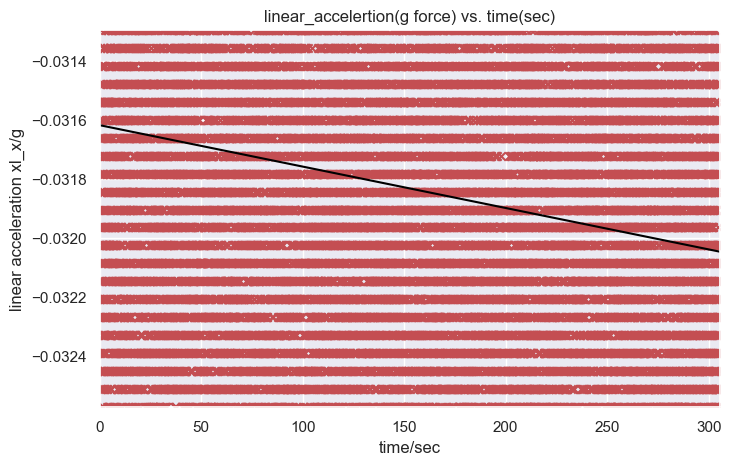

In [22]:
fig1 = show_err_prior_calibration("xl_x/g")

### plot for linear acceleration calibration error in y-axis

y_axis needs to += 0.0453

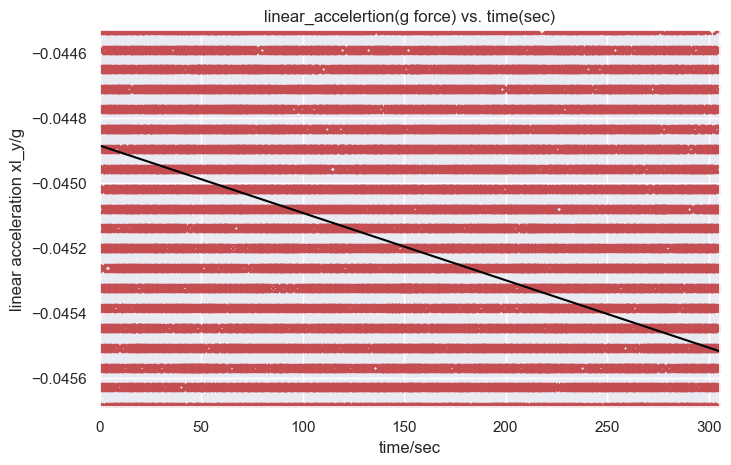

In [231]:
fig2 = show_err_prior_calibration("xl_y/g")

### plot for linear acceleration calibration error in z-axis

z_axis needs to -= 1.0175

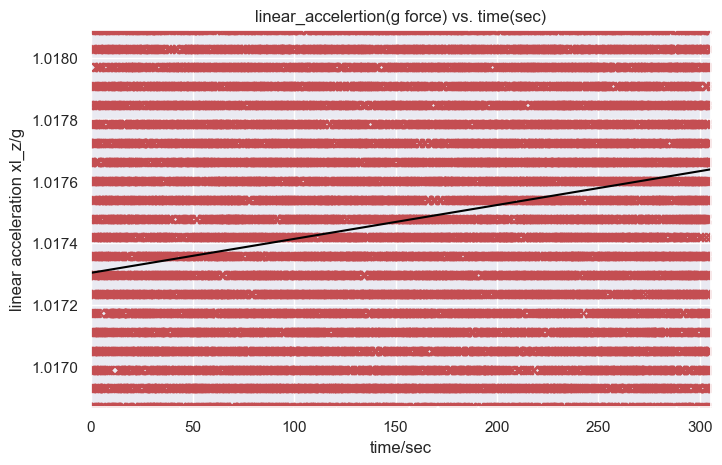

In [232]:
fig3 = show_err_prior_calibration("xl_z/g")

### plot for angular acceleration calibration error in x-axis

x_axis needs to += 1.17

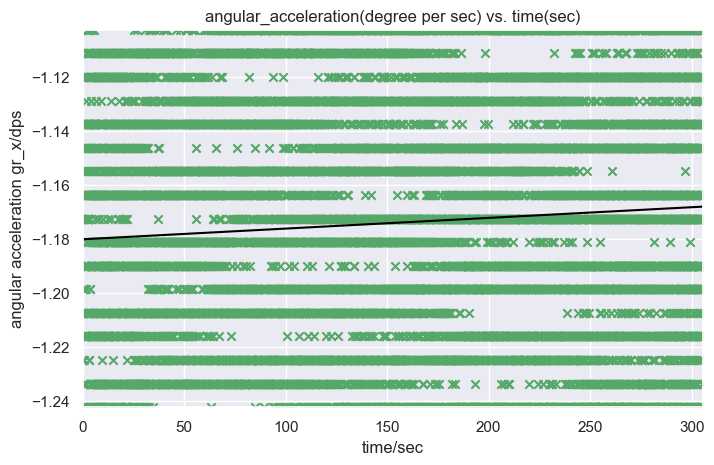

In [23]:
fig4 = show_err_prior_calibration("gr_x/dps")

### plot for angular acceleration calibration error in y-axis

y_axis needs to += 0.31

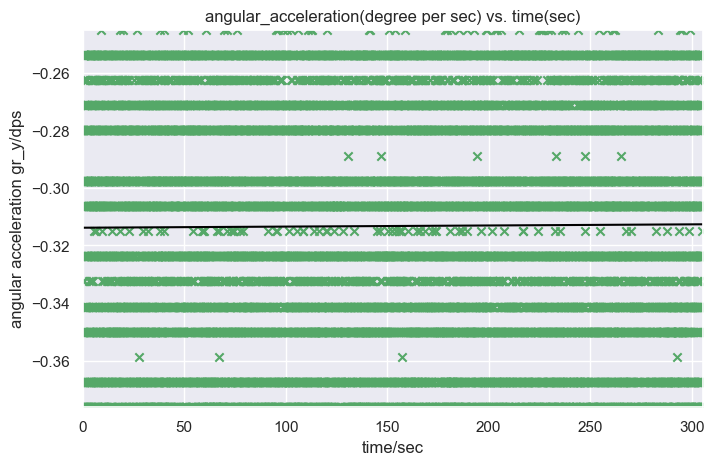

In [24]:
fig5 = show_err_prior_calibration("gr_y/dps")

### plot for angular acceleration calibration error in z-axis

z_axis needs to += 0.12

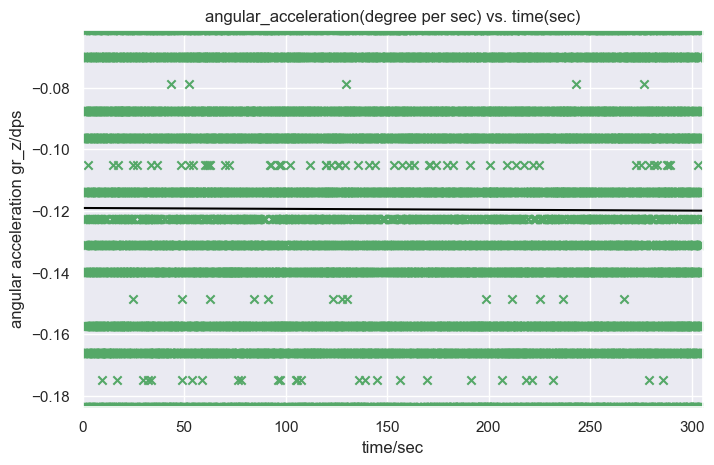

In [26]:
fig6 = show_err_prior_calibration("gr_z/dps")

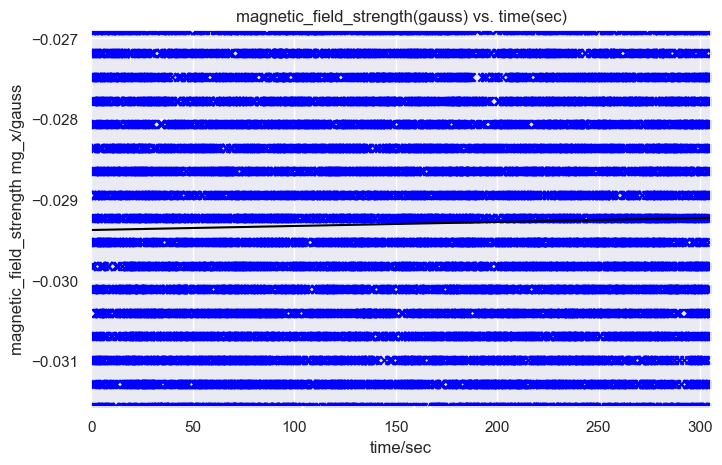

In [236]:
fig7 = show_err_prior_calibration("mg_x/gauss")

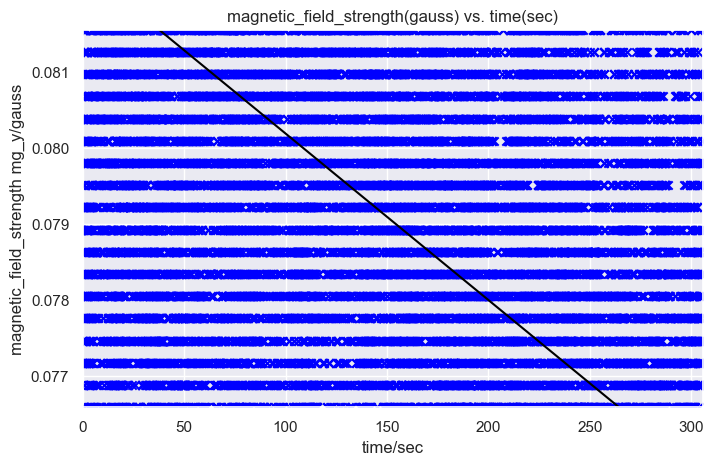

In [237]:
fig8 = show_err_prior_calibration("mg_y/gauss")

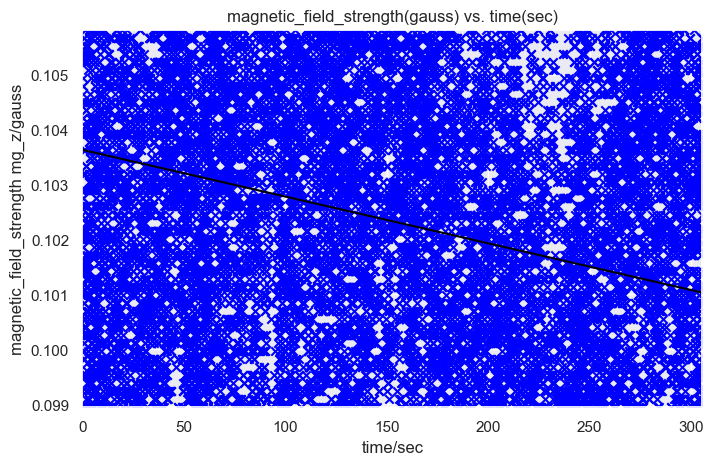

In [238]:
fig9 = show_err_prior_calibration("mg_z/gauss")